## Multiple Logistic Regression

* It is simple to illustrate examples in logistic regression when there is just one predictors variable.
* But the approach ‘easily’ generalizes to the situation where there are multiple predictors.
* However, there are also a number of issues raised which will apply to both logistic and linear regression with multiple predictors.  

### Two predictors and Two Classes

<p align="center">
  <img src="TwoPredictorsTwoClasses.png" alt="alt text" width="33%">
</p>



* Earlier we saw the general form of simple logistic regression, meaning when there
is just one predictor used in the model. 
* The model statement:
$$  \ln\left( \frac{P(Y = 1 \mid x)}{1 - P(Y = 1 \mid x)} \right) = \beta_0 + \beta_1 x $$
* Multiple logistic regression is a generalization to multiple predictors. 
More
* We can define a multiple logistic regression model to predict 𝑃(𝑌 = 1)
as such:

$$ \ln \left( \frac{P(Y = 1 \mid X)}{1 - P(Y = 1 \mid X)} \right)
= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_kx_k$$

where $X = \{x_1,x_2,x_3,x_4,...x_k \}$

* Its useful for us to begin getting used matrix-vector forms of writing this model down 

$$ \ln\left(\frac{P(Y = 1 \mid \boldsymbol(X))}{1 - P(Y = 1 \mid \boldsymbol(X))}\right) = \boldsymbol{\beta}^\top \mathbf{x}
$$

* I used a $\boldsymbol{x}$ to indicate a vector and $\boldsymbol{X}$ to indicate a matrix. 



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Examine what the number of pregnancies distribution looks like 
pima["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [7]:
cols = pima.columns
diabetes = pima['Outcome']
predictors = pima[cols[1:8]]

split the data into test and training sets and fit the model

In [9]:
predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors, diabetes, test_size=0.25, random_state=16)
# instantiate the model (using the default parameters, escept random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(predictors_train, diabetes_train)

LogisticRegression(max_iter=5000, random_state=16)

In [12]:
logreg.score(predictors_test,diabetes_test)

0.7916666666666666

Lets get the predictions and a confusion matrix

In [14]:
diabetes_pred = logreg.predict(predictors_test)

In [15]:
cnf_matrix = confusion_matrix(diabetes_test, diabetes_pred)

([<matplotlib.axis.YTick at 0x7fc39108aba0>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Diabetes')])

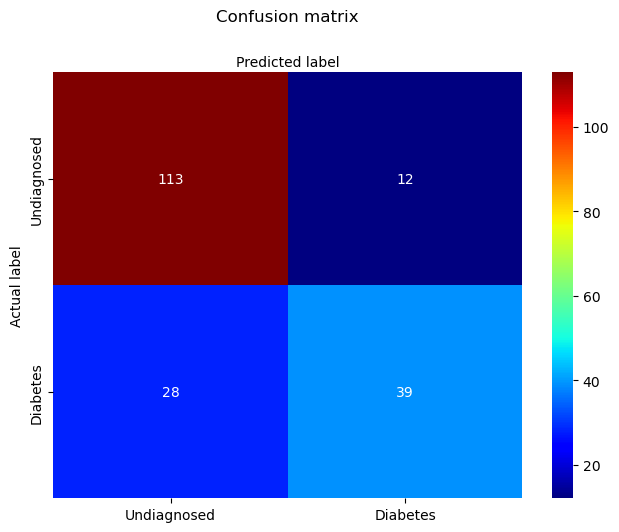

In [16]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

Get Precision Recall and F-1 score

In [17]:
print(classification_report(diabetes_test,diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.80      0.90      0.85       125
    Diabetes       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



ROC curve

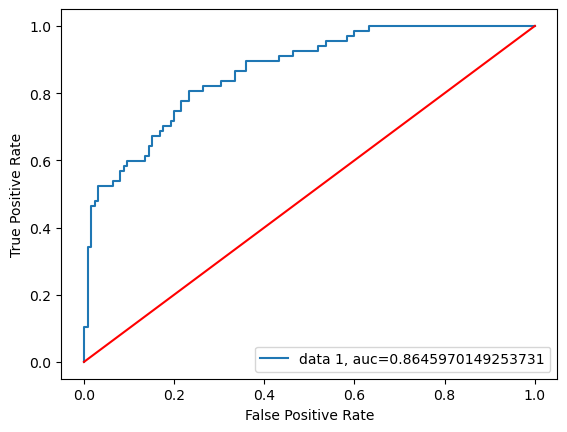

In [20]:

fpr, tpr, _ = roc_curve(diabetes_test,  diabetes_pprob[:,1])
auc = roc_auc_score(diabetes_test, diabetes_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()